In [86]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [144]:
def prepereDataWithoutLemmatisation(maximumNegativeRate, mimimumPositiveRate):
    comments = pd.read_csv('FilmWeb-detectingEmotions-lemmatisation.csv')
    comments.loc[comments.emotion == 'neutral', 'emotion'] = "negative"
    comments = comments[(comments.rate <= maximumNegativeRate) | (comments.rate >= mimimumPositiveRate)]
    comments = comments.reset_index()
    return comments

In [145]:
data = prepereDataWithoutLemmatisation(5,6)

In [146]:
def slowosiec(text):
    emotions = pd.read_csv('emotionsTable.csv')
    text = text.replace("[", "")
    text = text.replace(" ", "")
    text = text.replace("]", "")
    words_list = text.split(',')
    numberOfWords = len(words_list)
    numberOfWordsFound = 0
    result = 0
    if(numberOfWords > 0):
        emotionsCounter = 0
        for el in words_list: 
            if((emotions['word'] == el)).any():
                emotionsCounter += float(emotions.loc[emotions['word'] == el]['sentiment'].mean())  
                numberOfWordsFound += 1
        result = emotionsCounter/numberOfWords
    return result

In [147]:
def detectEmotion(text):
    return text.apply(slowosiec).apply(getEmotionStatusOfText)

In [148]:
def getEmotionStatusOfText(result):
    if(result <= 0):
        return 'negative'
    elif(result > 0):
        return 'positive'

In [149]:
data['detectedEmotion'] = detectEmotion(data['text'])

In [165]:
def get_length(text):
    return len(text)

def get_length_bin(length):
    return length / 10

def get_score(result):
    return 1 if result else 0

def prepereDataForPlot(result_df):
    result_df['correct_guess'] = result_df['detectedEmotion'] == result_df['emotion']
    result_df['score'] = map(get_score, result_df['correct_guess'])
    result_df['text_length'] = map(get_length, result_df['text'])
    #create group with 10 elements
    result_df['text_length_bin'] = map(get_length_bin, result_df['text_length'])    
    return result_df

In [153]:
def createPlot(data):
    grouped = data.groupby('text_length_bin', as_index=False)['score'].mean()
    fig, ax = plt.subplots()
    x = grouped.text_length_bin * 10
    y = grouped.score
    fit = np.polyfit(x, y, deg=1)
    ax.plot(x, fit[0] * x + fit[1], color='red')
    ax.scatter(x, y)

    fig.show()

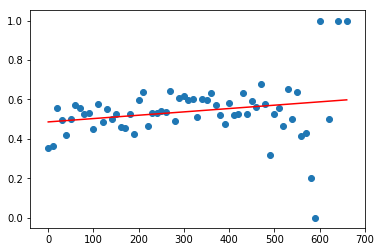

In [154]:
#plot for every comments
createPlot(newData)

NameError: name 'newData' is not defined

In [116]:
def changeRangeOfComments(maximumNegativeRate, mimimumPositiveRate, comments):
    comments = comments[(comments.rate <= maximumNegativeRate) | (comments.rate >= mimimumPositiveRate)]
    comments = comments.reset_index()
    return comments

In [124]:
def saveDataToFile(data, file_name):
    data.to_csv(file_name, encoding='utf-8', index=False)

In [155]:
smallerData = changeRangeOfComments(1,10, newData)

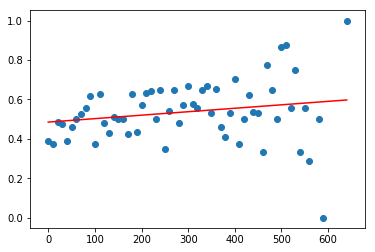

In [156]:
#plot for comments only with 1 or 10 rate
createPlot(smallerData)

In [126]:
#zaleznosc oceny od wykrytej emocji
def createPlotByRate(data):
    grouped = data.groupby('rate', as_index=False)['score'].mean()
    fig, ax = plt.subplots()
    x = grouped.rate
    y = grouped.score
    fit = np.polyfit(x, y, deg=1)
    ax.plot(x, fit[0] * x + fit[1], color='red')
    ax.scatter(x, y)

    fig.show()

rate
1.0      435
2.0      178
3.0      276
4.0      224
5.0      272
6.0      296
7.0      470
8.0      613
9.0      595
10.0    1096
dtype: int64

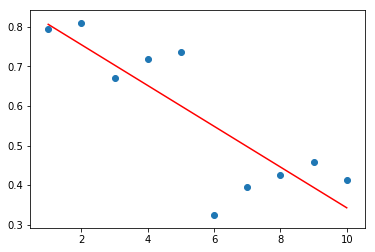

In [128]:
createPlotByRate(newData)
#podaje ilosc komentarzy z dana ocena
newData.groupby('rate').size()

In [157]:
def getNumberOfWordsFound(text):
    emotions = pd.read_csv('emotionsTable.csv')
    text = text.replace("[", "")
    text = text.replace(" ", "")
    text = text.replace("]", "")
    words_list = text.split(',')
    numberOfWords = len(words_list)
    result = 0
    if(numberOfWords > 0):
        emotionsCounter = 0
        for el in words_list: 
            if((emotions['word'] == el)).any():
                result += 1
    return result

In [158]:
def findingWords(text):
    return text.apply(getNumberOfWordsFound)

In [166]:
newdata['wordFound'] = findingWords(newdata['text'])

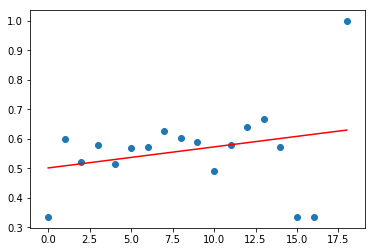

In [169]:
#stosunek znalezionych slow do skutecznosci dzialania

grouped = newdata.groupby('wordFound', as_index=False)['score'].mean()
fig, ax = plt.subplots()
x = grouped.wordFound
y = grouped.score
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.scatter(x, y)

fig.show()

In [180]:
comments = pd.read_csv('FilmWeb-analysis.csv')

In [171]:
comments

,detectedEmotion,emotion,lemmatisation,rate,text,words,wordsAfterLemmatisation,wordsFound
0,positive,positive,"[wiek, kolano, dla, wszystek, wszyscy, facet, ...",6.0,Strzał w kolano dla wszystkich facetów ...,54.0,45.0,6.0
1,negative,negative,"[gówno, wiek, srebrny, ja, się, to, ten, filmi...",2.0,Śmierdzące gówno w srebrnym celofaniku... ...,56.0,50.0,6.0
2,positive,positive,"[zaskoczyć, zaskoczenie, Oda, raz, zaznaczyć, ...",6.0,Całkowite zaskoczenie O...,61.0,57.0,6.0
3,negative,negative,"[chyba, dobrze, opisywać, to, ten, wiek, tym, ...",1.0,"""Boże, zaraz się zrzygam"".. ...",60.0,53.0,13.0
4,negative,positive,"[on, nie, wiedzieć, czy, to, ten, zauważyć, al...",8.0,"Jak ""Zmierzch"" nie wiem...",37.0,29.0,1.0
5,negative,neutral,"[taka, tak, złe, zły, jak, jaka]",5.0,"Nie tak złe, jak sądziłam.",5.0,6.0,1.0
6,positive,negative,"[gdyby, ktoś, próbować, uratować, ten, film, p...",2.0,Może gdyby ktoś próbował uratować ten film prz...,68.0,58.0,5.0
7,negative,negative,"[dla, leming, ujemny, film, on, nie, być, on, ...",1.0,"Film dla ""ajfonowych"" lemingów z ujemnym IQ. ...",35.0,32.0,2.0
8,negative,negative,"[dla, ubogi, mieszczka, młody, młodsza, młodsz...",4.0,"""Porno"" dla ubogich (mieszczek) ...",57.0,53.0,10.0
9,negative,negative,"[aktorski, na, poziom, polski, reprezentacja, ...",3.0,Słabo Gra aktorska na p...,19.0,17.0,3.0


In [195]:
def devide(number):
    return number/2
               
comments['half_wordsAfterLemmatisation'] = map(devide, comments['wordsAfterLemmatisation'])
comments['moreThenHalf'] = np.where(((comments['moreThenHalf'] >= comments['half_wordsAfterLemmatisation']) & (comments['half_wordsAfterLemmatisation'] > 0) & (comments['wordsFound'] > 0)), 1 , 0)

In [207]:
comments.groupby('moreThenHalf').size()

moreThenHalf
0    4440
1      15
dtype: int64

In [215]:
#jezeli znalazl wiecej niz polowe slow w Słowosieci
df = comments.loc[comments['moreThenHalf'] == 1]
df['correct_guess'] = df['detectedEmotion'] == df['emotion']
df.groupby('correct_guess').size()

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


correct_guess
False     4
True     11
dtype: int64

In [217]:
#jezeli znalazl mniej niz polowe slow w Słowosieci
df_less = comments.loc[comments['moreThenHalf'] == 0]
df_less['correct_guess'] = df_less['detectedEmotion'] == df_less['emotion']
df_less.groupby('correct_guess').size()

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


correct_guess
False    2348
True     2092
dtype: int64

In [218]:
review = pd.read_csv('FilmWeb-reviews-analysis.csv')

In [219]:
review

,detectedEmotion,emotion,lemmatisation,rate,text,words,wordsAfterLemmatisation,wordsFound
0,positive,positive,"[zdumiewać, zdumiewający, jak, jaka, bardzo, z...",7.0,"To zdumiewające, jak bardzo zmieniło się w ost...",450.0,293.0,38.0
1,negative,positive,"[jeszcze, nigdy, on, nie, być, nisko, on, nie,...",7.0,"""Niskie"" jeszcze nigdy nie było niżej, a ""wyso...",499.0,343.0,47.0
2,negative,positive,"[pozbyć, się, myśleć, myśl, myślić, że, jedno,...",7.0,"Trudno pozbyć się myśli, że jednym z formujący...",818.0,831.0,96.0
3,positive,positive,"[film, na, podstawa, własny, powieść, to, ten,...",7.0,Reżyserowanie filmu na podstawie własnej powie...,552.0,551.0,61.0
4,positive,negative,"[mieszek, mieszkać, wiek, słoneczny, Patagonia...",4.0,Tajemnica rozwiązana. Bóg mieszka w słonecznej...,335.0,337.0,48.0
5,positive,negative,"[wat, Stan, Stany, przez, kino, kin, kina, pon...",4.0,"W Stanach Zjednoczonych ""Złe psy"" zaledwie prz...",386.0,129.0,23.0
6,negative,negative,"[wszystek, wszyscy, mama, mieć, narkobiznes, o...",4.0,"Do wszystkich gringos: mamy narkobiznes, obcin...",634.0,287.0,32.0
7,negative,positive,"[horror, można, możny, czytać, jako, jaka, cią...",5.0,Gatunek horroru można czytać jako ciąg przestr...,623.0,185.0,16.0
8,negative,positive,"[pas, pasy, chwycić, się, poręcz, poręczyć, po...",8.0,"Zapnijcie pasy, chwyćcie się poręczy i uważajc...",414.0,10.0,1.0
9,positive,positive,"[wiek, okolica, uczciwy, człowiek, który, wiek...",8.0,"Jedyny w okolicy uczciwy człowiek, który w dus...",485.0,463.0,56.0


In [221]:
def devide(number):
    return number/2
               
review['half_wordsAfterLemmatisation'] = map(devide, review['wordsAfterLemmatisation'])
review['moreThenHalf'] = 0
review['moreThenHalf'] = np.where(((review['moreThenHalf'] >= review['half_wordsAfterLemmatisation']) & (review['half_wordsAfterLemmatisation'] > 0) & (review['wordsFound'] > 0)), 1 , 0)

In [223]:
review.groupby('moreThenHalf').size()

moreThenHalf
0    319
dtype: int64

In [226]:
review_less = review.loc[review['moreThenHalf'] == 0]
review_less['correct_guess'] = review_less['detectedEmotion'] == review_less['emotion']
review_less.groupby('correct_guess').size()

correct_guess
False    162
True     157
dtype: int64

In [227]:
review.groupby('rate').size()

rate
1.0      1
2.0      5
3.0     31
4.0     33
5.0     54
6.0     66
7.0     75
8.0     45
9.0      8
10.0     1
dtype: int64

In [228]:
def separeteByRate(maximumNegativeRate, mimimumPositiveRate,comments):
    comments = comments[(comments.rate <= maximumNegativeRate) | (comments.rate >= mimimumPositiveRate)]
    comments = comments.reset_index()
    return comments

In [231]:
review_smaller = separeteByRate(2, 9, review)

In [232]:
review_smaller['correct_guess'] = review_smaller['detectedEmotion'] == review_smaller['emotion']
review_smaller.groupby('correct_guess').size()

correct_guess
False    6
True     9
dtype: int64